# **Data process**

## Đổi tên các cột concat()

In [1]:
import pandas as pd

anno_df = pd.read_csv('/kaggle/input/project2-cs114-data/wecode.data/annonimized.csv')

anno_df.rename(columns={
    "concat('it001',`assignment_id`)": 'a_id',
    "concat('it001',`problem_id`)": 'p_id',
    "concat('it001', username)": 'username',
    "concat('it001',`language_id`)": 'lang_id',
}, inplace=True)

anno_df.head()

,a_id,p_id,username,is_final,status,pre_score,coefficient,lang_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


# **Trích xuất đặc trưng sinh viên**

## Đếm số lượng assignment đã tham gia

In [2]:
num_assignments = (
    anno_df[['username', 'a_id']]
    .drop_duplicates()
    .groupby('username')
    .size()
    .reset_index(name='num_assignments')
)

num_assignments

,username,num_assignments
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,9
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,4
4,013de369c439ab0ead8aa7da64423aa395a8be39,8
...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,9
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,6
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,6
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,7


## Đếm số lượng cột Status là SCORE và Error

In [ ]:
filtered_df = anno_df[anno_df['status'] == 'SCORE']

num_score = filtered_df.groupby('username').size().reset_index(name='score_count')

num_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   username     1475 non-null   object
 1   score_count  1475 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.2+ KB


In [ ]:
filtered_df = anno_df[(anno_df['status'] == 'Compilation Error') | (anno_df['status'] == 'Syntax Error')]

num_error = filtered_df.groupby('username').size().reset_index(name='compilation_error_count')

num_error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   username                 1428 non-null   object
 1   compilation_error_count  1428 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.4+ KB


## Số lần submit ứng với user

In [5]:
num_submit= anno_df['username'].value_counts()
num_submit_df = num_submit.reset_index()
num_submit_df.columns = ['username', 'num_submit']

num_submit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    1489 non-null   object
 1   num_submit  1489 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


## Số problem hoàn thành

In [6]:
# num_completed_problems = anno_df[anno_df['is_final'] == 1].groupby('username')['p_id'].nunique().reset_index(name='num_completed_problems')

# num_completed_problems

num_completed_problems = (
    anno_df[anno_df['pre_score'] == 10000]
    .drop_duplicates(subset=['username', 'p_id'])
    .groupby('username')
    .size()
    .reset_index(name='num_completed_problems')
)

num_completed_problems

,username,num_completed_problems
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,46
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,72
2,01122b3ef7e59b84189e65985305f575d6bdf83c,58
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,47
4,013de369c439ab0ead8aa7da64423aa395a8be39,44
...,...,...
1444,feb8a2859a011c59efd22ed419cb69288fe03627,34
1445,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,74
1446,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,99
1447,ff3fa2ec64294f37ae968159f810ebeda7966c51,30


## Số problem hoàn thành trễ

In [7]:
num_late_submit = (
    anno_df[(anno_df['coefficient'] < 100) & (anno_df['pre_score'] == 10000)]
    .drop_duplicates(subset=['username', 'p_id'])
    .groupby('username')
    .size()
    .reset_index(name='num_late_submit')
)

num_late_submit

,username,num_late_submit
0,0155f91fe242fe55e1af631b0f0afbe9938b185c,1
1,052039d5c5915699359b1d549b36ea69330c0ac3,1
2,05b134c1a682085880fb7ce76d221a48955e5b8a,2
3,0a9b6ec3e82e8a2527b21eb3420a6d9b72f4f71e,9
4,0aad9682c3c4280eb05dbd27e6cab55f4b1ae4b4,1
...,...,...
91,f7875ec1207504a229cd9b5ca132437c6bdd6a4d,2
92,f86b9fba1d59be7c864d4f23d0c7674113a27cab,2
93,f9491b0ab4aee90c428545e0e315a3af1f827595,2
94,f9f4d4ef2a3de006bd037db9eb160ab8e51c79f2,9


## Trung bình pre_score và coefficient

In [8]:
mean_scores = anno_df.groupby('username')[['pre_score', 'coefficient']].mean().reset_index()
mean_scores

,username,pre_score,coefficient
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5504.149660,100.000000
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,5488.552124,100.000000
2,01122b3ef7e59b84189e65985305f575d6bdf83c,5973.753846,100.000000
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,5952.760000,100.000000
4,013de369c439ab0ead8aa7da64423aa395a8be39,6474.448598,97.196262
...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,5581.081081,100.000000
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,6204.557692,100.000000
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,4998.466819,100.000000
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,4343.329787,100.000000


## Số bài khó hoàn thành

In [9]:
completed = (
    anno_df[anno_df['pre_score'] == 10000]
    .drop_duplicates(subset=['username', 'a_id', 'p_id'])
)

total_users_per_aid = (
    anno_df[['username', 'a_id']]
    .drop_duplicates()
    .groupby('a_id')
    .size()
    .reset_index(name='total_users')
)

num_completed_per_problem = (
    completed.groupby(['a_id', 'p_id'])['username']
    .nunique()
    .reset_index(name='num_users_completed')
)

completion_rate_df = num_completed_per_problem.merge(total_users_per_aid, on='a_id')
completion_rate_df['completion_rate'] = completion_rate_df['num_users_completed'] / completion_rate_df['total_users']

In [ ]:
def classify_difficulty(rate):
    if rate >= 0.7:
        return 'easy'
    elif rate >= 0.4:
        return 'medium'
    elif rate >= 0.2:
        return 'hard'
    else:
        return 'ex_hard'

completion_rate_df['difficulty'] = completion_rate_df['completion_rate'].apply(classify_difficulty)

completed_with_difficulty = completed.merge(
    completion_rate_df[['a_id', 'p_id', 'difficulty']],
    on=['a_id', 'p_id'],
    how='left'
)

num_submit_dif = (
    completed_with_difficulty
    .groupby(['username', 'difficulty'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

for col in ['easy', 'medium', 'hard', 'ex_hard']:
    if col not in num_submit_dif.columns:
        num_submit_dif[col] = 0

num_submit_dif

difficulty,username,easy,ex_hard,hard,medium
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,38,0,0,9
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,68,0,0,4
2,01122b3ef7e59b84189e65985305f575d6bdf83c,42,13,1,3
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,40,0,0,7
4,013de369c439ab0ead8aa7da64423aa395a8be39,52,0,0,6
...,...,...,...,...,...
1444,feb8a2859a011c59efd22ed419cb69288fe03627,32,0,0,2
1445,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,70,5,0,0
1446,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,102,0,0,0
1447,ff3fa2ec64294f37ae968159f810ebeda7966c51,27,1,0,2


## Số lần submit cho mỗi problem

In [ ]:
submit_per_problem = pd.merge(num_submit_df, num_completed_problems, on='username', how='outer')

submit_per_problem['submit_per_problem'] = submit_per_problem['num_submit'] / (submit_per_problem['num_completed_problems'])

submit_per_problem.drop(['num_submit', 'num_completed_problems'], axis=1, inplace=True)

print(submit_per_problem.isnull().sum())

submit_per_problem.fillna(0, inplace=True)

print(submit_per_problem.isnull().sum())

submit_per_problem

username               0
submit_per_problem    40
dtype: int64
username              0
submit_per_problem    0
dtype: int64


,username,submit_per_problem
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,3.195652
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,3.597222
2,01122b3ef7e59b84189e65985305f575d6bdf83c,3.362069
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,2.127660
4,013de369c439ab0ead8aa7da64423aa395a8be39,2.431818
...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,2.176471
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,3.513514
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,4.414141
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,3.133333


## Thời gian trung bình làm 1 problem 

In [12]:
# Đây là sample chứng tỏ đây là năm nhuận với 2-29 nên sẽ thêm 2024 vào các sample thiếu năm

anno_df.iloc[182684]

a_id                    1bec7c0b6a9bd8f556a8554c5012dcb778460bac
p_id                    f6332fbfbd01c31062bfe102deec29525aabec5a
username                0f0664021ebbec70b1d3bb5a5419e22507179671
is_final                                                       0
status                                                     SCORE
pre_score                                                      0
coefficient                                                  100
lang_id                                                   it0012
created_at                                        02-29 01:25:00
updated_at                                        02-29 01:26:38
judgement      {"times":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
Name: 182684, dtype: object

In [ ]:

import re 

LEAP_YEAR = "2024"  

created_raw = anno_df['created_at'].copy()
updated_raw = anno_df['updated_at'].copy()

def ensure_year(date_str):
    if pd.isna(date_str):
        return date_str
    if re.search(r'\b\d{4}\b', date_str):
        return date_str
    return f"{LEAP_YEAR} {date_str}"

anno_df['created_at'] = created_raw.apply(ensure_year)
anno_df['updated_at'] = updated_raw.apply(ensure_year)

anno_df['created_at'] = pd.to_datetime(anno_df['created_at'], errors='coerce')
anno_df['updated_at'] = pd.to_datetime(anno_df['updated_at'], errors='coerce')

anno_df['time_diff'] = (anno_df['updated_at'] - anno_df['created_at']).dt.total_seconds()

anno_df['time_diff'] = anno_df['time_diff'].where(anno_df['is_final'] == 1)

In [ ]:
user_p_mean = (
    anno_df
    .groupby(['username', 'p_id'])['time_diff']
    .mean()
    .reset_index(name='avg_time_per_problem')
)

user_mean_time = (
    user_p_mean
    .groupby('username')['avg_time_per_problem']
    .mean()
    .reset_index(name='avg_time_per_user')
)

user_mean_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   username           1489 non-null   object 
 1   avg_time_per_user  1488 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.4+ KB


## Merge các đặc trưng đã trích xuất

In [15]:
summary_df = num_submit_df \
    .merge(num_completed_problems, on='username', how='left') \
    .merge(num_late_submit, on='username', how='left') \
    .merge(mean_scores, on='username', how='left') \
    .merge(num_submit_dif, on='username', how='left') \
    .merge(submit_per_problem, on='username', how='left') \
    .merge(user_mean_time, on='username', how='left') \
    .merge(num_score, on='username', how='left') \
    .merge(num_error, on='username', how='left') \
    .merge(num_assignments, on='username', how='left') 

summary_df = summary_df.fillna(0)

summary_df[['num_submit', 'num_completed_problems', 'num_late_submit', 'easy', 'medium', 'hard', 'ex_hard', 'score_count', 'compilation_error_count']] = summary_df[[
    'num_submit', 'num_completed_problems', 'num_late_submit', 'easy', 'medium', 'hard', 'ex_hard', 'score_count','compilation_error_count']].astype(int)

summary_df

,username,num_submit,num_completed_problems,num_late_submit,pre_score,coefficient,easy,ex_hard,hard,medium,submit_per_problem,avg_time_per_user,score_count,compilation_error_count,num_assignments
0,9f605b4802c811805adc38ae19035ded09a5e4b5,1047,86,0,3071.882521,100.0,76,1,5,4,12.174419,854.175258,717,330,7
1,2cd5132c3c49bd9d4d5081e386a4d69a593f850a,1022,100,0,4413.339530,100.0,75,2,2,23,10.220000,9.958333,787,235,16
2,58f61331a385caeed17baaf54abea308426d50fe,833,109,0,2771.621849,100.0,107,0,0,2,7.642202,134.963303,525,307,5
3,1abf62f1e76bc5ac164061cff2a8171d6b6de657,749,100,0,2747.838451,100.0,101,1,0,7,7.490000,892.610632,415,334,7
4,33b16210a7736a6f75ef1b1f3cb7070a4d29395e,745,88,0,3870.371812,100.0,82,5,1,3,8.465909,707.314286,546,199,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,503affec12fb99997f583ed73b60262572694795,1,1,0,10000.000000,100.0,0,1,0,0,1.000000,9.000000,1,0,1
1485,f2418c1ba0f63cb975e6d8c26ce4a145b11ad924,1,0,0,0.000000,100.0,0,0,0,0,0.000000,3.000000,1,0,1
1486,713487f0de26590bca3c759e2fef02b3a5bad9fd,1,1,0,10000.000000,100.0,0,1,0,0,1.000000,8.000000,1,0,1
1487,c4f595ca17b4c13287b0beec0dbd45d0e356055b,1,0,0,0.000000,100.0,0,0,0,0,0.000000,1.000000,0,1,1


In [16]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   username                 1489 non-null   object 
 1   num_submit               1489 non-null   int64  
 2   num_completed_problems   1489 non-null   int64  
 3   num_late_submit          1489 non-null   int64  
 4   pre_score                1489 non-null   float64
 5   coefficient              1489 non-null   float64
 6   easy                     1489 non-null   int64  
 7   ex_hard                  1489 non-null   int64  
 8   hard                     1489 non-null   int64  
 9   medium                   1489 non-null   int64  
 10  submit_per_problem       1489 non-null   float64
 11  avg_time_per_user        1489 non-null   float64
 12  score_count              1489 non-null   int64  
 13  compilation_error_count  1489 non-null   int64  
 14  num_assignments         

# **Data thực hành**

## Xử lí data thực hành

In [17]:
th_df = pd.read_csv('/kaggle/input/project2-cs114-data/wecode.data/th-public.csv')
th_df.dropna(inplace=True)
th_df.rename(columns={'hash' : 'username'}, inplace=True)
th_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 760
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  755 non-null    object
 1   TH        755 non-null    object
dtypes: object(2)
memory usage: 17.7+ KB


## Merge với dataframe feature

(Note : Cảm giác mean_prescore và coefficient không có tác dụng)

In [18]:
th_df = summary_df.merge(th_df, on='username', how='inner')

th_df

,username,num_submit,num_completed_problems,num_late_submit,pre_score,coefficient,easy,ex_hard,hard,medium,submit_per_problem,avg_time_per_user,score_count,compilation_error_count,num_assignments,TH
0,2cd5132c3c49bd9d4d5081e386a4d69a593f850a,1022,100,0,4413.339530,100.0,75,2,2,23,10.220000,9.958333,787,235,16,8
1,58f61331a385caeed17baaf54abea308426d50fe,833,109,0,2771.621849,100.0,107,0,0,2,7.642202,134.963303,525,307,5,8
2,1abf62f1e76bc5ac164061cff2a8171d6b6de657,749,100,0,2747.838451,100.0,101,1,0,7,7.490000,892.610632,415,334,7,5
3,33b16210a7736a6f75ef1b1f3cb7070a4d29395e,745,88,0,3870.371812,100.0,82,5,1,3,8.465909,707.314286,546,199,11,5
4,45e8b53fe4fc590dd9c7564fe2c6fa3ede58fbea,738,110,0,3604.070461,100.0,101,0,1,9,6.709091,8.570796,567,171,5,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,4932174dcf0408a7eb862930c9c6be33d30825a6,1,1,0,10000.000000,100.0,0,1,0,0,1.000000,11.000000,1,0,1,9
751,4644e181d653c04f17f76eed400fdf52a43b2237,1,0,0,0.000000,100.0,0,0,0,0,0.000000,52.000000,1,0,1,8
752,503affec12fb99997f583ed73b60262572694795,1,1,0,10000.000000,100.0,0,1,0,0,1.000000,9.000000,1,0,1,5
753,713487f0de26590bca3c759e2fef02b3a5bad9fd,1,1,0,10000.000000,100.0,0,1,0,0,1.000000,8.000000,1,0,1,5.5


In [19]:
print(th_df['TH'].value_counts())

print(th_df['TH'].astype(str).unique())

TH
8      94
9      93
9.5    86
8.5    67
10     64
5      61
7.5    50
6.5    38
7      37
4.5    32
6      31
5.5    29
4      18
3.5    12
2.5    11
3      10
1.5     8
1       7
2       3
0.5     2
        2
Name: count, dtype: int64
['8' '5' '9.5' '8.5' '9' '10' '5.5' '7.5' '6.5' '7' '4.5' '4' '6' '3.5'
 '1.5' '2.5' '3' '0.5' '1' '2' '\xa0']


In [ ]:
th_df['TH_clean'] = th_df['TH'].astype(str).str.replace('\xa0', '', regex=False).str.strip()

th_df = th_df[th_df['TH_clean'] != '']

th_df = th_df.drop(columns=['TH_clean'])

th_df['TH'] = pd.to_numeric(th_df['TH'], errors='coerce')

th_df

,username,num_submit,num_completed_problems,num_late_submit,pre_score,coefficient,easy,ex_hard,hard,medium,submit_per_problem,avg_time_per_user,score_count,compilation_error_count,num_assignments,TH
0,2cd5132c3c49bd9d4d5081e386a4d69a593f850a,1022,100,0,4413.339530,100.0,75,2,2,23,10.220000,9.958333,787,235,16,8.0
1,58f61331a385caeed17baaf54abea308426d50fe,833,109,0,2771.621849,100.0,107,0,0,2,7.642202,134.963303,525,307,5,8.0
2,1abf62f1e76bc5ac164061cff2a8171d6b6de657,749,100,0,2747.838451,100.0,101,1,0,7,7.490000,892.610632,415,334,7,5.0
3,33b16210a7736a6f75ef1b1f3cb7070a4d29395e,745,88,0,3870.371812,100.0,82,5,1,3,8.465909,707.314286,546,199,11,5.0
4,45e8b53fe4fc590dd9c7564fe2c6fa3ede58fbea,738,110,0,3604.070461,100.0,101,0,1,9,6.709091,8.570796,567,171,5,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,4932174dcf0408a7eb862930c9c6be33d30825a6,1,1,0,10000.000000,100.0,0,1,0,0,1.000000,11.000000,1,0,1,9.0
751,4644e181d653c04f17f76eed400fdf52a43b2237,1,0,0,0.000000,100.0,0,0,0,0,0.000000,52.000000,1,0,1,8.0
752,503affec12fb99997f583ed73b60262572694795,1,1,0,10000.000000,100.0,0,1,0,0,1.000000,9.000000,1,0,1,5.0
753,713487f0de26590bca3c759e2fef02b3a5bad9fd,1,1,0,10000.000000,100.0,0,1,0,0,1.000000,8.000000,1,0,1,5.5


In [21]:
th_df['TH'] = th_df['TH'].astype(float)

## Chọn feature (Feature selection : Pearson Coefficient)

In [ ]:
numeric_cols = th_df.select_dtypes(include='number').columns

correlations = th_df[numeric_cols].corr(method='pearson')

th_corr = correlations['TH'].drop('TH') 

In [23]:
th_corr_sorted = th_corr.sort_values(ascending=False)
print(th_corr_sorted)

score_count                0.384856
num_completed_problems     0.366976
easy                       0.331603
num_submit                 0.331316
medium                     0.293526
num_assignments            0.287877
ex_hard                    0.206032
pre_score                  0.187059
hard                       0.187050
compilation_error_count    0.114755
num_late_submit            0.089522
avg_time_per_user          0.089324
submit_per_problem        -0.071073
coefficient               -0.124541
Name: TH, dtype: float64


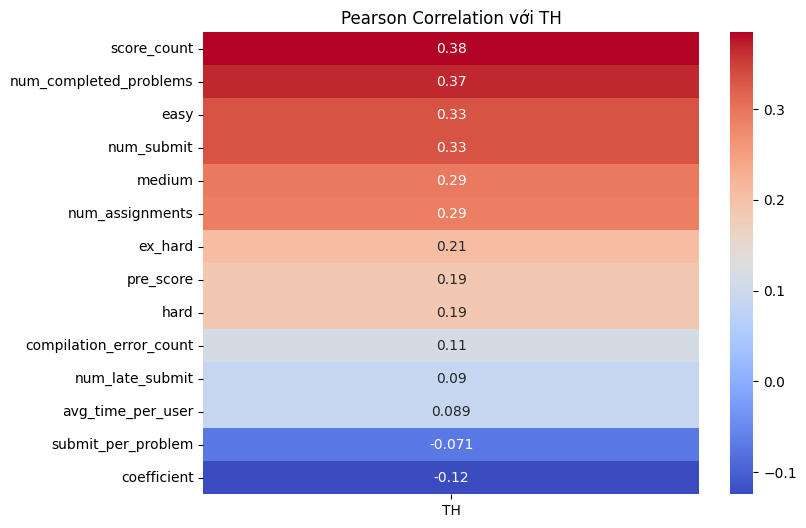

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(th_corr_sorted.to_frame(), annot=True, cmap='coolwarm')
plt.title('Pearson Correlation với TH')
plt.show()

In [25]:
chosen_features = th_corr[th_corr > 0.05].index.to_list()
chosen_features

['num_submit',
 'num_completed_problems',
 'num_late_submit',
 'pre_score',
 'easy',
 'ex_hard',
 'hard',
 'medium',
 'avg_time_per_user',
 'score_count',
 'compilation_error_count',
 'num_assignments']

# **Modeling**

## Chuẩn bị dữ liệu train, test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features = chosen_features
target = 'TH'

X = th_df[features]
y = th_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## SVR

In [ ]:
from sklearn.svm import SVR

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svr__C': [0.1, 1, 10, 100, 1000],
    'svr__gamma': ['scale', 'auto'],
    'svr__epsilon': [0.01, 0.1, 0.2, 0.5, 1.0]
}

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R² score (validation):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Test R² score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters: {'svr__C': 10, 'svr__epsilon': 1.0, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Best R² score (validation): 0.28453466756378176
Test RMSE: 2.0671460396731938
Test R² score: 0.15956501153617197


In [ ]:
summary_features = summary_df[features]

summary_df['predicted_TH'] = best_model.predict(summary_features)

print(summary_df[['username', 'predicted_TH']].head())

summary_df[['username', 'predicted_TH']].to_csv(
    'svr_predict.txt', index=False, header=False
)

                                   username  predicted_TH
0  9f605b4802c811805adc38ae19035ded09a5e4b5      6.979445
1  2cd5132c3c49bd9d4d5081e386a4d69a593f850a      7.318531
2  58f61331a385caeed17baaf54abea308426d50fe      7.044721
3  1abf62f1e76bc5ac164061cff2a8171d6b6de657      7.282417
4  33b16210a7736a6f75ef1b1f3cb7070a4d29395e      6.000295


In [ ]:

merged = summary_df.merge(th_df[['username', 'TH']], on='username', how='left')

merged['final_TH'] = merged['TH'].fillna(merged['predicted_TH'])

merged[['username', 'final_TH']].to_csv('svr_predictions_with_groundtruth.txt', index=False, header=False)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

param_grid = {
    'model__fit_intercept': [True, False],
    'model__positive': [True, False]  
}

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R² score (validation):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Test R² score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'model__fit_intercept': True, 'model__positive': False}
Best R² score (validation): 0.20494871764532965
Test RMSE: 2.0613668545557315
Test R² score: 0.1642577035953069


In [ ]:
summary_features = summary_df[features]

summary_df['predicted_TH'] = best_model.predict(summary_features)

print(summary_df[['username', 'predicted_TH']].head())

summary_df[['username', 'predicted_TH']].to_csv(
    'linearregression_predict.txt', index=False, header=False
)

                                   username  predicted_TH
0  9f605b4802c811805adc38ae19035ded09a5e4b5      7.514492
1  2cd5132c3c49bd9d4d5081e386a4d69a593f850a     10.884908
2  58f61331a385caeed17baaf54abea308426d50fe      6.382417
3  1abf62f1e76bc5ac164061cff2a8171d6b6de657      6.221840
4  33b16210a7736a6f75ef1b1f3cb7070a4d29395e      8.614151


In [ ]:

merged = summary_df.merge(th_df[['username', 'TH']], on='username', how='left')

merged['final_TH'] = merged['TH'].fillna(merged['predicted_TH'])

merged[['username', 'final_TH']].to_csv('lr_predictions_with_groundtruth.txt', index=False, header=False)

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100],             
    'model__fit_intercept': [True, False],
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R² score (validation):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Test R² score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'model__alpha': 1, 'model__fit_intercept': True, 'model__solver': 'lsqr'}
Best R² score (validation): 0.21165679902446569
Test RMSE: 2.0558732213201307
Test R² score: 0.1687063476479418


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py", line 129, in _solve_sparse_cg
    coefs[i], info = sp_linalg.cg(
                     ^^^^^^^^^^^^^
TypeError: cg() got an unexpected keyword argument 'tol'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_tr

In [ ]:
summary_features = summary_df[features]

summary_df['predicted_TH'] = best_model.predict(summary_features)

print(summary_df[['username', 'predicted_TH']].head())

summary_df[['username', 'predicted_TH']].to_csv(
    'ridgeregression_predict.txt', index=False, header=False
)

                                   username  predicted_TH
0  9f605b4802c811805adc38ae19035ded09a5e4b5      7.546152
1  2cd5132c3c49bd9d4d5081e386a4d69a593f850a     10.885839
2  58f61331a385caeed17baaf54abea308426d50fe      6.714701
3  1abf62f1e76bc5ac164061cff2a8171d6b6de657      6.057111
4  33b16210a7736a6f75ef1b1f3cb7070a4d29395e      8.604299


In [ ]:

merged = summary_df.merge(th_df[['username', 'TH']], on='username', how='left')

merged['final_TH'] = merged['TH'].fillna(merged['predicted_TH'])

merged[['username', 'final_TH']].to_csv('rr_predictions_with_groundtruth.txt', index=False, header=False)

## CatBoost

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(verbose=0, random_state=42)

# Các tham số cần dò
# param_grid = {
#     'iterations': [50, 100, 300, 500],
#     'depth': [4, 6, 8, 10, 12],
#     'learning_rate': [0.001, 0.01, 0.05, 0.1],
#     'l2_leaf_reg': [1, 3, 5, 7, 9]
# }

param_grid = {
    'iterations': [100, 300, 500],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R² score (validation):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Test R² score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best parameters: {'bootstrap_type': 'MVS', 'depth': 6, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.05}
Best R² score (validation): 0.3730591141627991
Test RMSE: 1.984040050721306
Test R² score: 0.22578305121003128


In [ ]:
summary_features = summary_df[features]

summary_df['predicted_TH'] = best_model.predict(summary_features)

print(summary_df[['username', 'predicted_TH']].head())

summary_df[['username', 'predicted_TH']].to_csv(
    'catboost_predict.txt', index=False, header=False
)

                                   username  predicted_TH
0  9f605b4802c811805adc38ae19035ded09a5e4b5      6.716002
1  2cd5132c3c49bd9d4d5081e386a4d69a593f850a      7.850497
2  58f61331a385caeed17baaf54abea308426d50fe      7.623511
3  1abf62f1e76bc5ac164061cff2a8171d6b6de657      7.107603
4  33b16210a7736a6f75ef1b1f3cb7070a4d29395e      6.494309


In [ ]:

merged = summary_df.merge(th_df[['username', 'TH']], on='username', how='left')

merged['final_TH'] = merged['TH'].fillna(merged['predicted_TH'])

merged[['username', 'final_TH']].to_csv('catb_predictions_with_groundtruth.txt', index=False, header=False)

## XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    verbosity=0  # Tắt log của XGBoost
)

# Grid các tham số cần dò
# param_grid = {
#     'n_estimators': [20, 50, 100, 200, 300],
#     'max_depth': [1, 3, 5, 7, 9],
#     'learning_rate': [0.001, 0.01, 0.05, 0.1],
#     'subsample': [0.4, 0.6, 0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

param_grid = {
    'n_estimators': [50, 100, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 3, 5]   
}


grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation R²:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse}")
print(f"Test R² score: {r2}")


Fitting 5 folds for each of 11664 candidates, totalling 58320 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 5, 'subsample': 0.6}
Best cross-validation R²: 0.38182492922504807
Test RMSE: 1.9732584758188936
Test R² score: 0.2341746135002497


In [ ]:
summary_features = summary_df[features]

summary_df['predicted_TH'] = best_model.predict(summary_features)

print(summary_df[['username', 'predicted_TH']].head())

summary_df[['username', 'predicted_TH']].to_csv(
    'xgboost_predict.txt', index=False, header=False
)

                                   username  predicted_TH
0  9f605b4802c811805adc38ae19035ded09a5e4b5      6.701309
1  2cd5132c3c49bd9d4d5081e386a4d69a593f850a      8.085752
2  58f61331a385caeed17baaf54abea308426d50fe      7.850435
3  1abf62f1e76bc5ac164061cff2a8171d6b6de657      7.374716
4  33b16210a7736a6f75ef1b1f3cb7070a4d29395e      6.871890


In [ ]:

merged = summary_df.merge(th_df[['username', 'TH']], on='username', how='left')

merged['final_TH'] = merged['TH'].fillna(merged['predicted_TH'])

merged[['username', 'final_TH']].to_csv('xgb_predictions_with_groundtruth.txt', index=False, header=False)